<a href="https://colab.research.google.com/github/RAHULRAANU/NLP/blob/main/lstmfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import numpy as np
import swifter
import re
import string
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading path 
path1 = r'/content/cybersecurity_tweets.csv'
path2 = r'/content/not_cybersecurity_tweets.csv'

In [4]:
csv1 = pd.read_csv(path1)
csv2 = pd.read_csv(path2)

df = pd.concat([csv1,csv2])

In [5]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
199995,Attackers Test Weak Passwords in Purple Fox Ma...,0
199996,Aviso para los usuarios de correo de @AytoMurc...,0
199997,NPM had an obfuscated birthday-like easter egg...,0
199998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


In [6]:
df = shuffle(df)
df

,text,label
165766,The latest The Ransomware Daily! https://t.co/...,1
86245,"In January, the Zscaler ThreatLabz research te...",0
176030,Who can beat China in terms of number? #DEVCom...,1
111673,New phishing against POST customers. hXXps://...,0
11642,Office 365 Phishing Campaign Uses Kaspersky’s ...,0
...,...,...
53716,Hackers Increasingly Using HTML Smuggling in M...,1
101060,"Chinese Malware Attacks Linked to #CCP, Chines...",0
88532,Cybersecurity Experts Warn of a Rise in Lyceum...,1
140464,Anti-Spam para #WordPress 🚨 🔹Tipos de SPAM en ...,0


In [7]:
df.text



165766    The latest The Ransomware Daily! https://t.co/...
86245     In January, the Zscaler ThreatLabz research te...
176030    Who can beat China in terms of number? #DEVCom...
111673    New phishing against POST customers.  hXXps://...
11642     Office 365 Phishing Campaign Uses Kaspersky’s ...
                                ...                        
53716     Hackers Increasingly Using HTML Smuggling in M...
101060    Chinese Malware Attacks Linked to #CCP, Chines...
88532     Cybersecurity Experts Warn of a Rise in Lyceum...
140464    Anti-Spam para #WordPress 🚨 🔹Tipos de SPAM en ...
13866     Digital voice technology under threat from foc...
Name: text, Length: 400000, dtype: object

In [8]:
df.drop_duplicates(inplace = True)

## Text Preprocessing


In [9]:
class text_preprocess:
    
    def __init__(self):
        pass

    def convert_to_lower(self, text):
        return text.lower()

    def remove_emojis(self, text):
        text = re.sub(r"(?:\@|https?\://)\S+", " ", text) #remove links and mentions
        text = re.sub(r"<.*?>"," ",text)

        wierd_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emotions
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

        rm_emoji = wierd_pattern.sub(r'', text)
        return rm_emoji

    def remove_html(self, text):
        html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        rm_html = re.sub(html, ' ', text)
        return rm_html

    def remove_URL(self,text):
        url = re.compile(r'https?://\S+|www\.\S+')
        URL = url.sub(r' ', text)
        return URL
    
    def remove_non_ascii(self, text):
        return re.sub(r'[^\x00-\x7f]',r' ', text) # or ''.join([x for x in text if x in string.printable]) 
    
    
    def remove_numbers(self, text):
        number_pattern = r'\d+'
        without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
        return without_number


    def remove_punctuation(self,text):
        return text.translate(str.maketrans(' ', ' ', string.punctuation))


    def remove_extra_white_spaces(self, text):
        single_char_pattern = re.compile(r'\s+[a-zA-Z]\s+')
        without_sc = re.sub(single_char_pattern, r" ", text)
#         without_sc = text.replace(' ', '')
        return without_sc


    def preprocessText(self,text):            
        return self.remove_extra_white_spaces(self.remove_non_ascii(self.remove_URL(self.remove_html(self.remove_punctuation(self.remove_numbers(self.remove_emojis(self.convert_to_lower(text))))))))


In [10]:
if __name__ == "__main__":    
    text_prpocess_obj = text_preprocess()
    df.text = df.text.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [11]:
df.text

165766    the latest the ransomware daily   thanks to   ...
86245     in january the zscaler threatlabz research tea...
176030    who can beat china in terms of number devcommu...
111673    new phishing against post customers  hxxpsinst...
11642     office   phishing campaign uses kaspersky amaz...
                                ...                        
53716     hackers increasingly using html smuggling in m...
101060    chinese malware attacks linked to ccp chinese ...
88532     cybersecurity experts warn of rise in lyceum h...
140464    antispam para wordpress  tipos de spam en word...
13866     digital voice technology under threat from foc...
Name: text, Length: 390162, dtype: object

## Tokenization of words

In [12]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# !pip install spacy
# !python -m spacy download en_core_web_sm
# import spacy
# nlp = spacy.load("en_core_web_sm")  # giving installation error

In [13]:
# Tokenizing the tweet base texts.
def tokenize(text):
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    return token_list    

In [14]:
df.text = df.text.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [15]:
df.text

165766    [the, latest, the, ransomware, daily,   , than...
86245     [in, january, the, zscaler, threatlabz, resear...
176030    [who, can, beat, china, in, terms, of, number,...
111673    [new, phishing, against, post, customers,  , h...
11642     [office,   , phishing, campaign, uses, kaspers...
                                ...                        
53716     [hackers, increasingly, using, html, smuggling...
101060    [chinese, malware, attacks, linked, to, ccp, c...
88532     [cybersecurity, experts, warn, of, rise, in, l...
140464    [antispam, para, wordpress,  , tipos, de, spam...
13866     [digital, voice, technology, under, threat, fr...
Name: text, Length: 390162, dtype: object

## Remove Stopwords

In [16]:
def remove_stopwords(text):    
    filtered_sentence =[] 
    for word in text:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

In [17]:
df.text = df.text.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [18]:
df.text

165766    latest ransomware daily    thanks    security ...
86245     january zscaler threatlabz research team ident...
176030    beat china terms number devcommunity programmi...
111673    new phishing post customers   hxxpsinstabiocc ...
11642     office    phishing campaign uses kaspersky ama...
                                ...                        
53716     hackers increasingly html smuggling malware ph...
101060    chinese malware attacks linked ccp chinese min...
88532     cybersecurity experts warn rise lyceum hacker ...
140464    antispam para wordpress   tipos de spam en wor...
13866     digital voice technology threat focussed disru...
Name: text, Length: 390162, dtype: object

## Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')


w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

words = set(nltk.corpus.words.words())
# words = nltk.word_tokenize(corpus)

class lemmatization:
    
    def __init__(self):
        pass
    
    def lemmatizing_space(self, text):   
        return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

    # def lemmatizing_words(self, text):
    #     return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

    # def lemmatize(self, text):
    #     return self.lemmatizing_space(self.lemmatizing_words(text))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
if __name__ == "__main__":
  lemmatization_obj = lemmatization()
  df.text = df.text.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [21]:
df

,text,label
165766,latest ransomware daily thanks security ransom...,1
86245,january zscaler threatlabz research team ident...,0
176030,beat china term number devcommunity programmin...,1
111673,new phishing post customer hxxpsinstabiocc jrd...,0
11642,office phishing campaign us kaspersky amazon s...,0
...,...,...
53716,hacker increasingly html smuggling malware phi...,1
101060,chinese malware attack linked ccp chinese mini...,0
88532,cybersecurity expert warn rise lyceum hacker g...,1
140464,antispam para wordpress tipos de spam en wordp...,0


## Stemming

In [22]:
# # Stemming
# from nltk.stem.snowball import SnowballStemmer

# snow_stemmer = SnowballStemmer(language='english')
  
# def stemmizing(text):    
#     #stem of each word
#     stem_words = []
#     for w in text:
#         x = snow_stemmer.stem(w)
#         stem_words.append(x)
#     return "".join(stem_words)

In [23]:
# df['text'] = df.text.swifter.apply(lambda x: stemmizing(x))

In [24]:
# df.text

##  Remove words from a string of length between 2

In [25]:
def removelt2wordslength(text):    
    for x in text:
        xx = re.compile(r'\W*\b\w{1,2}\b')
        rm_word = re.sub(xx, '', text)
        return rm_word

In [26]:
df.text = df.text.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [27]:
df.text

165766    latest ransomware daily thanks security ransom...
86245     january zscaler threatlabz research team ident...
176030    beat china term number devcommunity programmin...
111673    new phishing post customer hxxpsinstabiocc jrd...
11642       office phishing campaign kaspersky amazon token
                                ...                        
53716     hacker increasingly html smuggling malware phi...
101060    chinese malware attack linked ccp chinese mini...
88532     cybersecurity expert warn rise lyceum hacker g...
140464    antispam para wordpress tipos spam wordpress t...
13866     digital voice technology threat focussed disru...
Name: text, Length: 390162, dtype: object

## Lstm
We will not going to create RNN model due to its vanishing gradient problem instead of that we will going to create LSTM model.LSTMs have an additional state called ‘cell state’ through which the network makes adjustments in the information flow. The advantage of this state is that the model can remember or forget the leanings more selectively. First of all we are going to do tokenization then we will generate sequence of n-grams.After that we will going to do padding.Padding is required because all the sentences are of different length so we need to make them of same length.We will going to do this by adding 0 in the end of the text with the help of pad_sequences function of keras


In [28]:
df = df.dropna()
df

,text,label
165766,latest ransomware daily thanks security ransom...,1
86245,january zscaler threatlabz research team ident...,0
176030,beat china term number devcommunity programmin...,1
111673,new phishing post customer hxxpsinstabiocc jrd...,0
11642,office phishing campaign kaspersky amazon token,0
...,...,...
53716,hacker increasingly html smuggling malware phi...,1
101060,chinese malware attack linked ccp chinese mini...,0
88532,cybersecurity expert warn rise lyceum hacker g...,1
140464,antispam para wordpress tipos spam wordpress t...,0


In [29]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


## Tokenization

In [30]:
max_words = 100000
max_len = 19
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(df['text'].values)
sequences = tok.texts_to_sequences(df['text'].values)
sequences_matrix = pad_sequences(sequences, padding = 'post', maxlen= max_len)


In [31]:
sequences_matrix

array([[  16,    7,   36, ...,    0,    0,    0],
       [  90, 1362,   66, ...,   48, 2183,   34],
       [1240,  162,  243, ..., 1389,  545,  355],
       ...,
       [   1,  113,  779, ...,    0,    0,    0],
       [3081,   95,  320, ...,    0,    0,    0],
       [  82, 1373,   22, ...,    0,    0,    0]], dtype=int32)

In [32]:
Y = df[['label']]

In [33]:
Y

,label
165766,1
86245,0
176030,1
111673,0
11642,0
...,...
53716,1
101060,0
88532,1
140464,0


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix,Y, test_size = 0.27, random_state = 2529 ,stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(284756, 19) (284756, 1)
(105321, 19) (105321, 1)


## lstm architecture
# Embedding : Generates embedding vector for each input sequence
# Dense : Fully connected layer for classification
# bidirectional : Another type of rnn simultaneously learn forward and backword direction of information flow
# Lstm : long short term memory, its a variant of RNN which has memory state cell to learn the context of words are at the further along the text to carry contextual meaning rahther than just neighbouring words as in case of rnn

In [35]:
import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout

embid_dim = 512
lstm_out = 128


model = keras.Sequential()
model.add(Embedding(max_words, embid_dim, input_length = sequences_matrix.shape[1]))
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 512)           51200000  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              656384    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                        

In [36]:
from tensorflow.keras.optimizers import Adam, SGD

model.compile(loss='binary_crossentropy',optimizer= Adam(learning_rate = 0.01), metrics=['accuracy'])

In [37]:
# history = model.fit(X_train,Y_train,epochs=10, validation_data= (X_test, Y_test),
#           callbacks=[EarlyStopping(monitor='val_loss',min_delta=0, patience=3, verbose=1, mode='auto' )])

# batch_size = 64
# earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
# history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data= (X_test, Y_test),callbacks=[earlystop])

batch_size = 128
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, epochs = 11, batch_size=batch_size, verbose = 1, validation_data= (X_test, Y_test),callbacks=[earlystop])

Epoch 1/11
2225/2225 [==============================] - 84s 36ms/step - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0589 - val_accuracy: 0.9811
Epoch 2/11
2225/2225 [==============================] - 79s 35ms/step - loss: 0.0653 - accuracy: 0.9808 - val_loss: 0.0601 - val_accuracy: 0.9816
Epoch 3/11
2225/2225 [==============================] - 79s 35ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.0605 - val_accuracy: 0.9819
Epoch 4/11
2225/2225 [==============================] - 79s 36ms/step - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.0713 - val_accuracy: 0.9825
Epoch 5/11
2225/2225 [==============================] - 79s 35ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0791 - val_accuracy: 0.9831
Epoch 6/11
2225/2225 [==============================] - 80s 36ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.0638 - val_accuracy: 0.9823
Epoch 7/11
2225/2225 [==============================] - 80s 36ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0766 -

## Model Evaluation
# Plot Accuracy and Loss

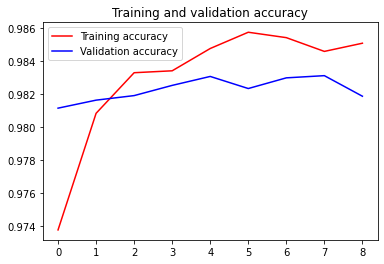

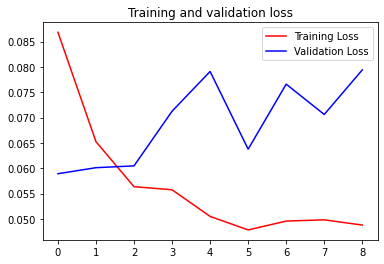

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [40]:
Y_pred = model.predict(X_test)
Y_pred

3292/3292 [==============================] - 10s 3ms/step


array([[0.9999995],
       [1.       ],
       [1.       ],
       ...,
       [1.       ],
       [1.       ],
       [1.       ]], dtype=float32)

In [41]:
Y_pred[0]

array([0.9999995], dtype=float32)

In [42]:
test_accuracy = accuracy_score(Y_test,Y_pred.round())
test_accuracy

0.9818554704190048

In [43]:
conf_matrix = confusion_matrix(Y_test,Y_pred.round())
conf_matrix

array([[52224,   437],
       [ 1474, 51186]])

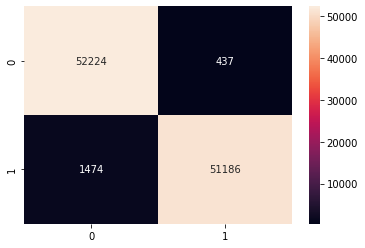

In [44]:
# heatmap of confusion matrix
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test, Y_pred.round()), annot=True, fmt = '1d');

In [45]:
# classification report
print(classification_report(Y_test,  Y_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52661
           1       0.99      0.97      0.98     52660

    accuracy                           0.98    105321
   macro avg       0.98      0.98      0.98    105321
weighted avg       0.98      0.98      0.98    105321



## Testing
the model will ouput a prediction score between 0 and 1 . we can classify two classes by defining a threshold value for it. in our case i have set 0.5 as Threshold value, if the score above it, Then it will classified as 
Cybersecurity text

In [46]:
def decode_text(score):
  return "cybersecurity_text" if score > 0.50 else "Not_cybersecurity_text"

score = model.predict(X_test)  
print(len(score))

3292/3292 [==============================] - 9s 3ms/step
105321


In [69]:
score.round()

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [48]:
Y_pred.mean() # for threshold

0.49538624

In [49]:
y_pred_text = [decode_text(score) for score in score]
# y_pred_text

In [50]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


In [51]:
text =  ['Threat:Someone with 😬 Foot In Mouth the potential to 😰 Anxious Face with Sweat cause harm by damaging 🚩 Appearance historically differs greatly cross-platform. Use with caution. 🚨.']

In [52]:
df = pd.DataFrame(text, columns=['text1'])

In [53]:
df

,text1
0,Threat:Someone with 😬 Foot In Mouth the potent...


In [54]:
# text Preprocessing
df.text1 = df.text1.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# Tokenization
df.text1 = df.text1.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
# Remove Stopwords
df.text1 = df.text1.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
# Lemmatization
df.text1 = df.text1.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
# Remove words from a string of length between 2
df.text1 = df.text1.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
df.text1.tolist()

['threatsomeone foot mouth potential anxious face sweat cause harm damaging appearance historically differs greatly crossplatform use caution']

In [60]:
tokk = Tokenizer()
tokk.fit_on_texts(df.text1.values)
seq = tokk.texts_to_sequences(df.text1.values)
seqmatrix = pad_sequences(seq, padding = 'post', maxlen= max_len)

In [61]:
test = model.predict(seqmatrix)

1/1 [==============================] - 0s 19ms/step


In [62]:
test

array([[0.9999995]], dtype=float32)

In [63]:
y_pred_text_other = [decode_text(score) for score in test]

In [64]:
y_pred_text_other

['cybersecurity_text']

In [65]:
# model.save('lstm.h5')